# Summary

实验结果：

在 CIFAR10 数据集上的实验结果，使用 GPU GTX 1080.

| 模型 | 正确率 | 运行时间 |
| -- | -- | -- |
| AlexNet | 70% | 45s |
| VggNet | 78% | 500s |

观点：

1. VggNet 成功的把网络做的更深了，模型的算法性能也有了不错的提升。
2. CIFAR10 数据集可能不足以体现 VggNet 的优势，需要换 ImageNet 试一下

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import time

tf.__version__

'2.1.0'

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# using Batch Norm

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H, C = x_train.shape
N_LABELS = 10

weight_decay = 0.000

model = models.Sequential()

# //////// starting
# 1st max pooling. 2 conv layer
model.add(layers.Conv2D(64, (3, 3), padding='same',
                 input_shape=(W, H, C), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 2nd max pooling. 2 conv layer
model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3rd max pooling. 3 conv layer
model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 4th max pooling. 3 conv layer
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 5th max pooling. 3 conv layer
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# 2 Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(N_LABELS, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print('!! start time counting')
tic = time.time()

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.0852 - accuracy: 0.2730 - val_loss: 1.5258 - val_accuracy: 0.4365
Epoch 2/10
50000/50000 [==============================] - 49s 985us/sample - loss: 1.3984 - accuracy: 0.4961 - val_loss: 1.3332 - val_accuracy: 0.5622
Epoch 3/10
50000/50000 [==============================] - 49s 985us/sample - loss: 1.1125 - accuracy: 0.6151 - val_loss: 1.2190 - val_accuracy: 0.6067
Epoch 4/10
50000/50000 [==============================] - 49s 986us/sample - loss: 0.9724 - accuracy: 0.6727 - val_loss: 0.8789 - val_accuracy: 0.7029
Epoch 5/10
50000/50000 [==============================] - 49s 988us/sample - loss: 0.8501 - accuracy: 0.7203 - val_loss: 0.8442 - val_accuracy: 0.7317
Epoch 6/10
50000/50000 [==============================] - 49s 988us/sample - loss: 0.7547 - accuracy: 0.7558 - val_loss: 0.6965 - val_accuracy: 0.7688
Epoch 7/10
50000/50000 

10000/10000 - 3s - loss: 0.6729 - accuracy: 0.7891
0.7891


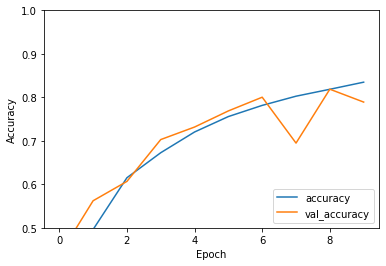

In [5]:
# train vs evaluate 的 accuracy 曲线
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)